
# **Лабораторная работа №4**

## Загрузка данных

---

В качестве набора данных будем использовать [набор данных о хоралах Баха](https://rpubs.com/bsnacks000/107391)

Набор данных содержит следующие колонки:
+ chorale_ID - номер хорала
+ event_number - id события
+ pitch_1 - pitch_12 - наличие в аккорде каждой из 12 нот
+ bass - нижняя нота аккорда
+ meter - важность аккорда
+ chord_label - название аккорда


In [13]:
# Импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO 
import graphviz 
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Загрузка датасета
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/bach_choral_set_dataset.csv')

In [14]:
# Первые 5 строк датасета
dataset.head()

,choral_ID,event_number,pitch_1,pitch_2,pitch_3,pitch_4,pitch_5,pitch_6,pitch_7,pitch_8,pitch_9,pitch_10,pitch_11,pitch_12,bass,meter,chord_label
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M


In [15]:
# Типы колонок
dataset.dtypes

choral_ID       object
event_number     int64
pitch_1         object
pitch_2         object
pitch_3         object
pitch_4         object
pitch_5         object
pitch_6         object
pitch_7         object
pitch_8         object
pitch_9         object
pitch_10        object
pitch_11        object
pitch_12        object
bass            object
meter            int64
chord_label     object
dtype: object

In [16]:
# Количество классов
len(dataset['chord_label'].unique())

102

In [17]:
# Будем использовать только те классы, которые составляют более 5%
freqs = dataset['chord_label'].value_counts(normalize=True)*100
ind = []
for i in range(0, dataset.shape[0]):
  if freqs[dataset.iloc[i]['chord_label']]<5:
    ind.append(i)
dataset.drop(axis=0, index=ind, inplace = True)
dataset.shape

(2828, 17)

In [18]:
# Новое количество классов
len(dataset['chord_label'].unique())

7

In [19]:
# Кодирование категориальных признаков
le = LabelEncoder()
dataset['choral_ID'] = le.fit_transform(dataset['choral_ID'])
for i in range(1,13):
  col = 'pitch_'+str(i)
  dataset[col] = le.fit_transform(dataset[col])
dataset['bass'] = le.fit_transform(dataset['bass'])
dataset['chord_label'] = le.fit_transform(dataset['chord_label'])

In [20]:
# Разделение данных на целевые и нецелвые колонки
data = pd.DataFrame(dataset[dataset.columns.difference(['chord_label'])])
target = dataset['chord_label'].copy()

## Разделение на обучающую и тестовую выборки


---

In [33]:
# Разделение на обучающую и тестовую выборки
xtrain, xtest, ytrain, ytest = train_test_split(
    data, target, test_size=0.3, random_state=1)

train_acc = dict()
test_acc = dict()

## Обучение моделей


---

Train accuracy:  0.9277412834765033
Test accuracy:  0.9187279151943463 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


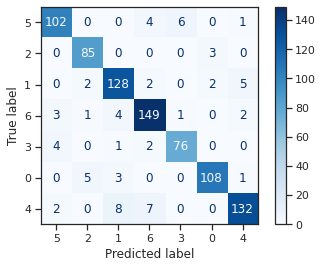

In [34]:
# Логистическая регрессия
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(xtrain, ytrain)
train_acc['Logistic Regression'] = accuracy_score(ytrain, lr.predict(xtrain))
test_acc['Logistic Regression'] = accuracy_score(ytest, lr.predict(xtest))
print('Train accuracy: ', train_acc['Logistic Regression'])
print('Test accuracy: ', test_acc['Logistic Regression'], '\n')
plot_confusion_matrix(lr, xtest, ytest, 
                      display_labels=target.unique(), cmap=plt.cm.Blues)

Train accuracy:  0.9297625063163214
Test accuracy:  0.9210836277974087 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


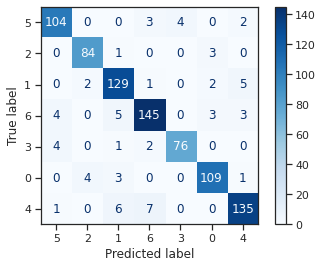

In [35]:
# SVM
svc = SVC(kernel='linear')
svc.fit(xtrain, ytrain)
train_acc['SVC'] = accuracy_score(ytrain, svc.predict(xtrain))
test_acc['SVC'] = accuracy_score(ytest, svc.predict(xtest))
print('Train accuracy: ', train_acc['SVC'])
print('Test accuracy: ', test_acc['SVC'], '\n')
plot_confusion_matrix(svc, xtest, ytest, 
                      display_labels=target.unique(), cmap=plt.cm.Blues)

Train accuracy:  1.0
Test accuracy:  0.9069493521790342 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


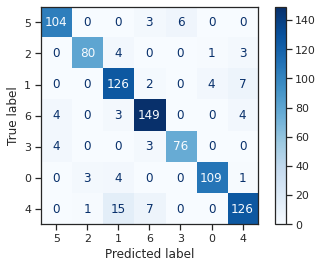

In [36]:
# Решающее дерево
dtc = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)
train_acc['Decision Tree'] = accuracy_score(ytrain, dtc.predict(xtrain))
test_acc['Decision Tree'] = accuracy_score(ytest, dtc.predict(xtest))
print('Train accuracy: ', train_acc['Decision Tree'])
print('Test accuracy: ', test_acc['Decision Tree'], '\n')
plot_confusion_matrix(dtc, xtest, ytest, 
                      display_labels=target.unique(), cmap=plt.cm.Blues)

## Сравнение качества моделей


---

In [37]:
def plot_acc(metric, suptitle):
  fig, ax = plt.subplots(figsize=(7,5))
  fig.suptitle(suptitle)
  ind = np.arange(len(metric))
  plt.barh(ind, metric.values())
  plt.yticks(ind, metric)
  # Вывод значений
  for a,b in zip(ind, metric.values()):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
  plt.show()
  return

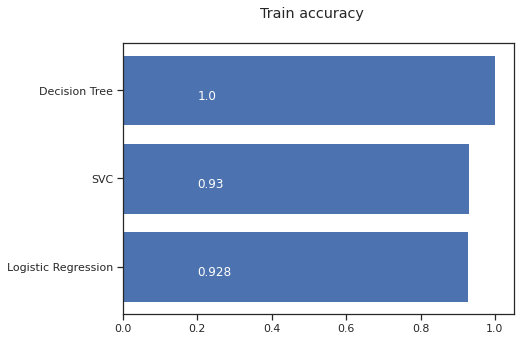

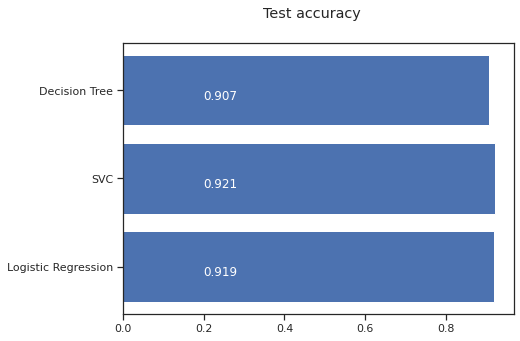

In [38]:
plot_acc(train_acc, 'Train accuracy')
plot_acc(test_acc, 'Test accuracy')

## Визуализация решающего дерева


---

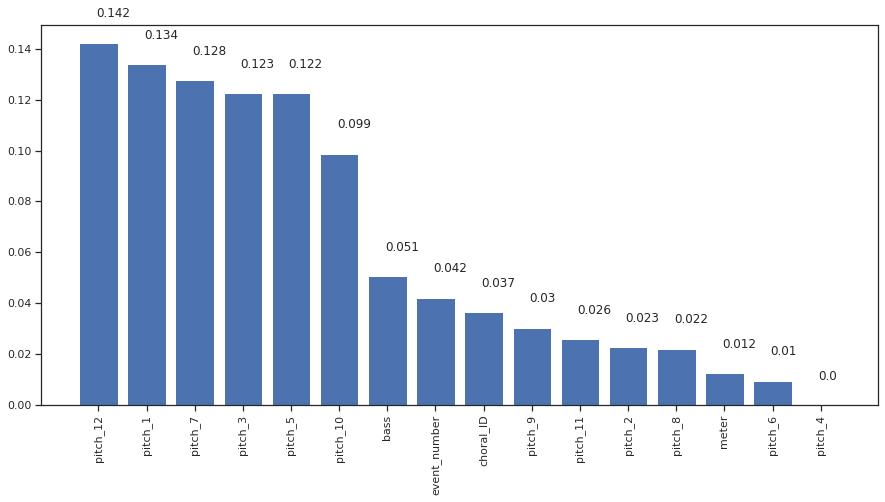

In [39]:
# График важности признаков
from operator import itemgetter
# Сортировка значений важности признаков по убыванию
list_to_sort = list(zip(pd.DataFrame(data=data, columns=data.columns).columns.values, dtc.feature_importances_))
sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
# Названия признаков
labels = [x for x,_ in sorted_list]
# Важности признаков
dat = [x for _,x in sorted_list]
# Вывод графика
fig, ax = plt.subplots(figsize=(15,7))
ind = np.arange(len(labels))
plt.bar(ind, dat)
plt.xticks(ind, labels, rotation='vertical')
# Вывод значений
for a,b in zip(ind, dat):
   plt.text(a-0.05, b+0.01, str(round(b,3)))
plt.show()

In [40]:
# Визуализация дерева
dot_data = export_graphviz(dtc, out_file=None, 
                           feature_names=data.columns, 
                           class_names=list(dataset['chord_label'].map(lambda x: str(x))), 
                           filled=True, rounded=True, special_characters=True)  
pydot_graph = pydotplus.graph_from_dot_data(dot_data)


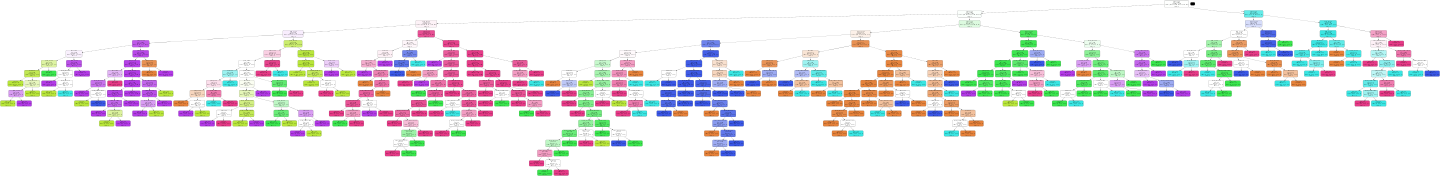

In [41]:
# Сохранение изображения в png
pydot_graph.set_size('"150,150!"')
pydot_graph.write_png('tree.png')
# Вывод изображения
pydot_graph.set_size('"15,15!"')
graph = pydot_graph.create_png()
Image(graph)

In [42]:
# Правила дерева решений
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(dtc, feature_names=list(data.columns))
HTML('<pre>' + tree_rules + '</pre>')